In [12]:
import numpy as np



In [13]:
import semiparametrictransfer
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
from semiparametrictransfer.sinusoid_dataset import create_piecewise_sinusoid_dataset
from semiparametrictransfer.utils.general_utils import AttrDict
from semiparametrictransfer.models.sptmodel import SPTModelTestime
import _pickle as pkl

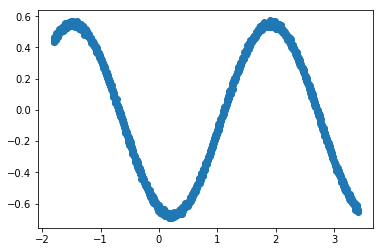

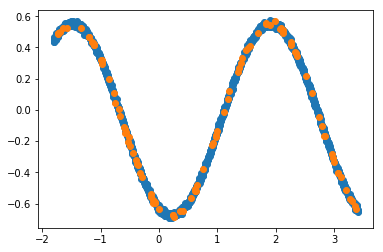

In [4]:
def visualize_sinus_dataset(data):
    for sinus in data.l_sinus_samples:
        plt.plot(sinus.x_vals, sinus.y_vals, 'o')        
    plt.show()
    
def visualize_dataset(data):
    plt.plot(data.train[:,0], data.train[:,1] , 'o')
    plt.plot(data.val[:,0], data.val[:,1], 'o')
    plt.show()

# save_path = '/nfs/kun1/users/febert/data/semiparametrictransfer/trainingdata/single_sinus.pkl'
save_path = None
data = create_piecewise_sinusoid_dataset(save_path)
visualize_sinus_dataset(data)
visualize_dataset(data)
    

hp [('batch_size', -1), ('data_conf', None), ('device', None), ('goal_cond', True), ('img_sz', None), ('input_nc', 3), ('max_seq_len', -1), ('n_actions', -1), ('normalization', 'batch'), ('restore_path', None), ('s_embed_dim', 32), ('state_dim', -1), ('top_k', 10), ('use_batchnorm', True), ('use_convs', True)]
overriding param restore_path to value /nfs/kun1/users/febert/data/semiparametrictransfer/experimentdata/sinlge_sinus_nobn_lay3_2020-06-05_17-53-54/weights/weights_ep195.pth
overriding param batch_size to value 100
overriding param in_dim to value 1
overriding param out_dim to value 128
overriding param normalization to value None
overriding param in_dim to value 128
overriding param out_dim to value 128
overriding param normalization to value None
overriding param in_dim to value 128
overriding param out_dim to value 128
overriding param normalization to value None
overriding param in_dim to value 128
overriding param out_dim to value 128
overriding param normalization to value 

/home/febert/Documents/cloned_projects/semiparametrictransfer/semiparametrictransfer/utils/layers.py:10: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  nn.init.xavier_normal(m.weight.data)


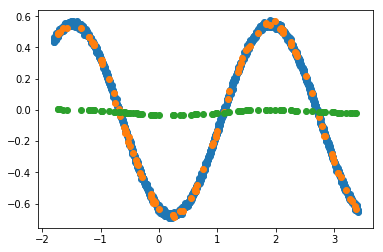

In [8]:
import torch

data_path = '/nfs/kun1/users/febert/data/semiparametrictransfer/trainingdata/single_sinus.pkl'

def make_predictions(val_data):
    
    params = {'restore_path':'/nfs/kun1/users/febert/data/semiparametrictransfer/experimentdata/sinlge_sinus_nobn_lay3_2020-06-05_17-53-54/weights/weights_ep195.pth',
              'batch_size': val_data.shape[0]}
    testmodel = SPTModelTestime(overrideparams=params)
    testmodel.eval()
    y_pred = testmodel.forward(AttrDict(data_x=val_data[:, 0][:, None]))
    return y_pred.y.data.numpy().squeeze()

def visualize_testdata(data_path):
    data = pkl.load(open(data_path, "rb"))
    torch_val_data = torch.from_numpy(data.val).float()                    
    y_pred = make_predictions(torch_val_data)
    
    plt.plot(data.train[:,0], data.train[:,1] , 'o')
    plt.plot(data.val[:,0], data.val[:,1], 'o')
    plt.plot(data.val[:,0], y_pred, 'o')
                    
    plt.show()
    

visualize_testdata(data_path)

hp [('batch_size', -1), ('data_conf', None), ('device', None), ('goal_cond', True), ('img_sz', None), ('input_nc', 3), ('max_seq_len', -1), ('n_actions', -1), ('normalization', 'batch'), ('restore_path', None), ('s_embed_dim', 32), ('state_dim', -1), ('top_k', 10), ('use_batchnorm', True), ('use_convs', True)]
overriding param restore_path to value /nfs/kun1/users/febert/data/semiparametrictransfer/experimentdata/quadratic_2020-06-06_11-27-12/weights/weights_ep5.pth
overriding param batch_size to value 100
overriding param in_dim to value 1
overriding param out_dim to value 128
overriding param normalization to value None
overriding param in_dim to value 128
overriding param out_dim to value 128
overriding param normalization to value None
overriding param in_dim to value 128
overriding param out_dim to value 128
overriding param normalization to value None
overriding param in_dim to value 128
overriding param out_dim to value 128
overriding param normalization to value None
overriding

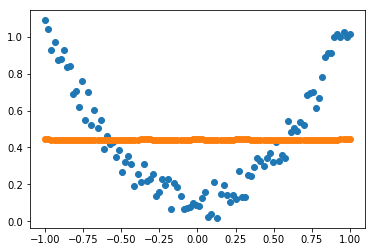

In [16]:
import torch

def make_predictions(val_data):
    
    params = {'restore_path':'/nfs/kun1/users/febert/data/semiparametrictransfer/experimentdata/quadratic_2020-06-06_11-27-12/weights/weights_ep5.pth',
              'batch_size': 100}
    testmodel = SPTModelTestime(overrideparams=params)
    testmodel.eval()
    y_pred = testmodel.forward(val_data)
    return y_pred.y.data.numpy().squeeze()

def visualize_testdata():
    
    x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
    y = x.pow(2) + 0.2 * torch.rand(x.size())
    torch_val_data = AttrDict(data_x=x, data_y=y)
    
    y_pred = make_predictions(torch_val_data)
    
    plt.plot(x.data.numpy(), y.data.numpy() , 'o')
    plt.plot(x.data.numpy(), y_pred, 'o')
                    
    plt.show()
    

visualize_testdata()